#Importing Required Libraries

In [0]:
#!pip install tensorflow==2.0
import tensorflow as tf
print(tf.__version__)
import numpy as np
print(np.__version__)
import seaborn as sns
import matplotlib.pyplot as plt
from keras import utils
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os 
import cv2
import pickle as pk
from sklearn.neighbors import KNeighborsClassifier

1.15.0
1.17.5


Mounting the Google Drive for Data access

In [0]:
from google.colab import drive
drive.mount('/content/drive')

#Loading MNIST HandWritten Digits Data

In [0]:

data = tf.keras.datasets.mnist

(x_train,y_train) , (x_test,y_test) = data.load_data()

Let's Make a Look to Our Data...........

Label Value Is  :  5


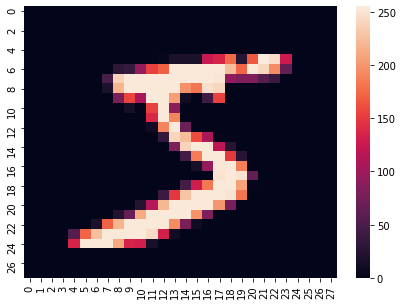

Label Value Is  :  0


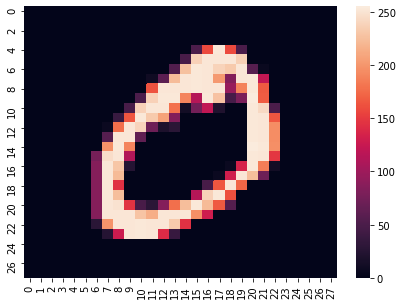

Label Value Is  :  4


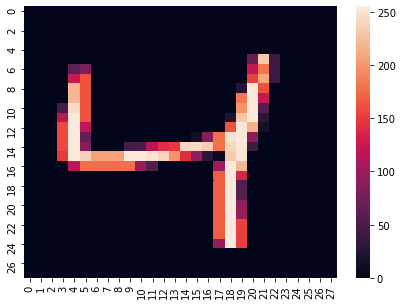

Label Value Is  :  1


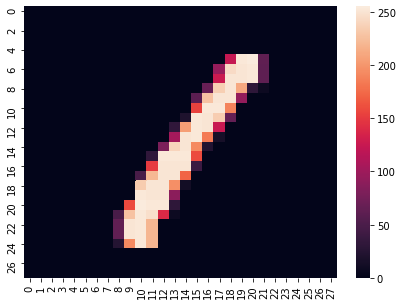

Label Value Is  :  9


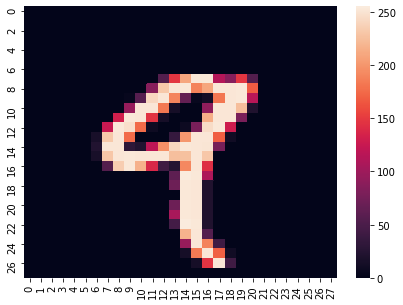

In [0]:
#plt.matshow(x_train[155])

for i in range(5): 
    plt.figure(figsize=(7,5))   
    sns.heatmap(x_train[i])
    print('Label Value Is  : ',y_train[i])
    plt.show()

#Normalizing The Data Points 
1.) All The Image Data is Scaled between 0 and 1   
2.) All The Label Data is transformed using One Hot Encoding. 

In [0]:
x_train = x_train/255
x_test = x_test/255

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

print('Size of Training Data : ',len(y_train))
print('Size of Testing Data : ',len(y_test))
print('Shape of Training Data : ',x_train.shape)
print('Shape of Testing Data : ',x_test.shape)

Size of Training Data :  60000
Size of Testing Data :  10000
Shape of Training Data :  (60000, 28, 28)
Shape of Testing Data :  (10000, 28, 28)


#Creating Neural Network Model
it's a simple neural network model with :             
1.) Input Layer with 784 nodes                                        
2.) 3 Hidden Layers with 1024,512,128 nodes respectivily, with relu as activation function.             
3.) An output layer with 10 node and sigmoid as activation function        

In [0]:
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.models import Sequential
from keras.optimizers import rmsprop

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
#model.add(Dense(784,input_shape=(784,)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,395,594
Trainable params: 1,395,594
Non-trainable params: 0
_________________________________________________________________
None


Using TensorFlow backend.


Compiling Our Model with:                              
1.) rmsprop as the Optimizer
2.) Binary crossEntropy as loss function


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#Training and Validating The Model

In [0]:
model.fit(x_train,y_train,batch_size=32,epochs=4,validation_data=(x_test,y_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/4





60000/60000 [==============================] - 26s 438us/step - loss: 0.0359 - acc: 0.9881 - val_loss: 0.0205 - val_acc: 0.9938
Epoch 2/4
60000/60000 [==============================] - 25s 422us/step - loss: 0.0198 - acc: 0.9945 - val_loss: 0.0197 - val_acc: 0.9951
Epoch 3/4
60000/60000 [==============================] - 25s 416us/step - loss: 0.0182 - acc: 0.9956 - val_loss: 0.0219 - val_acc: 0.9950
Epoch 4/4
60000/60000 [==============================] - 25s 422us/step - loss: 0.0177 - acc: 0.9961 - val_loss: 0.0307 - val_acc: 0.9935


#Precting and Verifying Accuracy

In [0]:
y_pred = model.predict(x_test)
y_pred[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#One Hot Encoded to categorical conversion

In [0]:
def convert_encoded_numeric(y):
    l=[]
    for i in y:
        s1 = list(i)
        s2 = s1.index(max(s1))
        l.append(s2)
    return np.array(l)


In [0]:
y_test_new = convert_encoded_numeric(y_test)
y_pred_new = convert_encoded_numeric(y_pred)
print('\nAccuracy score of Neural Network Model : ',accuracy_score(y_test_new,y_pred_new)*100,'%')


Accuracy score of Neural Network Model :  96.86 %


#Creating file of model for future use.........

In [0]:

os.chdir('/content/drive/My Drive/Colab Notebooks/TF_Course')

with open('digits_NN','wb') as ff:
    pk.dump(model,ff)
    print('file Sucessfully created...........')

file Sucessfully created...........


#Using K-Nearest-Neighbour                                             

Now we will use KNN(Machine Learning) approch for our model and see the accuracy....


#Normalizing Data according to KNN

In [0]:
x_train1 = [i.flatten() for i in x_train]
x_train1[0].shape
x_test1 = [i.flatten() for i in x_test]
x_test1[0].shape

print('Shape of training date : ',x_train.shape)
print('Shape of testing date : ',x_test.shape)

Shape of training date :  (60000, 28, 28)
Shape of testing date :  (10000, 28, 28)


#model Structure for K-neighbour-classifier

In [0]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train1,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_1=model_knn.predict(x_test1)
y_1

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
print('/nAccuracy Score of KNN Model : ',model_knn.score(x_test1,y_test)*100,'%')

Accuracy Score of KNN Model :  96.6 %


#**Now we have to test our Models on **"Real Data"** **

we have a file having mobile-camera-clicked digits images let's test 

In [0]:
!ls drive/My\ Drive/numbers

ls: cannot access 'drive/My Drive/numbers': No such file or directory


#Creating Testing fuction for Neural network

In [0]:

def NN_MODEL(name):
    #img = cv2.imread('/content/drive/My Drive/numbers/'+name+'.jpg')
    img = name
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    (thresh, bg) = cv2.threshold(img, 149, 255, cv2.THRESH_BINARY)
    img1 = cv2.resize(bg,(93,93))/255
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if(img1[i,j]<=0.7):
                img1[i,j]=1
            elif(img1[i,j]>0.7):
                img1[i,j]=0
    img2 = cv2.resize(img1[1:85,4:97],(28,28))
    sns.heatmap(img2)
    #print(img2)
    s = list(model.predict([[img2]])[0])
    d = s.index(max(s))
    print(s)
    print('Predicted value is : ',d)
    return d

#Creating Testing function for KNN model

In [0]:
def KNN_MODEL(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    (thresh, bg) = cv2.threshold(img, 149, 255, cv2.THRESH_BINARY)
    img1 = cv2.resize(bg,(93,93))/255
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if(img1[i,j]<=0.7):
                img1[i,j]=1
            elif(img1[i,j]>0.7):
                img1[i,j]=0
    img2 = cv2.resize(img1[1:85,4:97],(28,28))
    sns.heatmap(img2)
    plt.show()
    s = list(model_knn.predict([img2.flatten()])[0])
    d = s.index(max(s))
    print(s)
    print('Predicted value is : ',d)
    return d
    #print(model1.predict([img2.flatten()]))

Reading Image files from Google Drive

In [0]:
val = input('Enter Image Name : ')
img = cv2.imread('/content/drive/My Drive/numbers/'+val+'.jpg')

Enter Image Name : three


#Output for KNN Model.........

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Predicted value is :  3
3


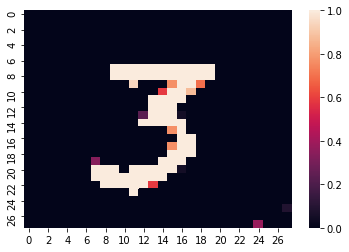

In [0]:
op1 = KNN_MODEL(img)
print(op1)

#Output for NN model.......

[0.0, 1.4901161e-07, 0.0, 0.99993587, 0.0, 4.7683716e-07, 0.0, 0.0, 0.0, 0.0]
Predicted value is :  3
3


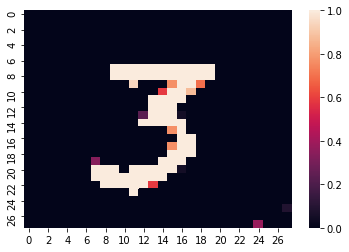

In [0]:
op1 = NN_MODEL(img)
print(op1)

#Testing out model on a Video                                       
we have a video file in our google drive having video of different numbers

[0.38641945, 0.38218877, 0.43986928, 0.42824024, 0.4467932, 0.4017118, 0.35823092, 0.4221612, 0.5370722, 0.50555384]
Predicted value is :  8
[0.38641945, 0.38218877, 0.43986928, 0.42824024, 0.4467932, 0.4017118, 0.35823092, 0.4221612, 0.5370722, 0.50555384]
Predicted value is :  8
[0.38641945, 0.38218877, 0.43986928, 0.42824024, 0.4467932, 0.4017118, 0.35823092, 0.4221612, 0.5370722, 0.50555384]
Predicted value is :  8
[0.38641945, 0.38218877, 0.43986928, 0.42824024, 0.4467932, 0.4017118, 0.35823092, 0.4221612, 0.5370722, 0.50555384]
Predicted value is :  8
[0.38641945, 0.38218877, 0.43986928, 0.42824024, 0.4467932, 0.4017118, 0.35823092, 0.4221612, 0.5370722, 0.50555384]
Predicted value is :  8
[0.38641945, 0.38218877, 0.43986928, 0.42824024, 0.4467932, 0.4017118, 0.35823092, 0.4221612, 0.5370722, 0.50555384]
Predicted value is :  8
[0.38641945, 0.38218877, 0.43986928, 0.42824024, 0.4467932, 0.4017118, 0.35823092, 0.4221612, 0.5370722, 0.50555384]
Predicted value is :  8
[0.38641945, 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


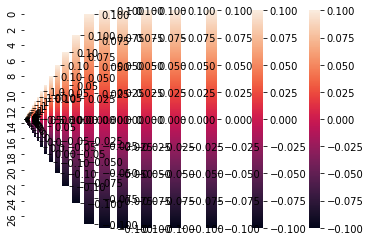

In [0]:
import cv2
import time
l=[]
try:
    cam = cv2.VideoCapture('/content/drive/My Drive/numbers/fil.mp4')
    st = time.time()
    for i in range(50):
        _,frame = cam.read()
        v=NN_MODEL(frame)
       
        #et=time.time()
        #if(st-et>6):
        #    break
        if(cv2.waitKey(1)==0):
            break
except:
    pass
finally:
    print(np.array(l).mean())

In [0]:
np.round(model.predict([[img1]]))

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [0]:
1+2.3841858e-07

1.00000023841858

In [0]:
|

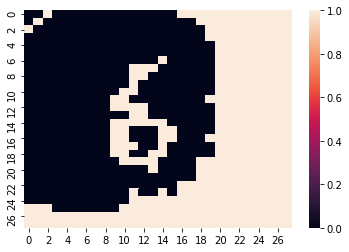

In [0]:
sns.heatmap(img1)

In [0]:
model.predict([[img1]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
img1.shape

(28, 28)

In [0]:
model.predict(x_test)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)